In [38]:
% matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [39]:
# 基于我们的轮廓系数来选择最佳的n_cluesters
# 知道每个聚出来的类的轮廓系数是多少，还想要一个各个类之间的轮廓系数的对比
# 知道聚类完毕之后的图像分布是什么模样

In [40]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=1)

In [41]:
n_clusters = 4

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


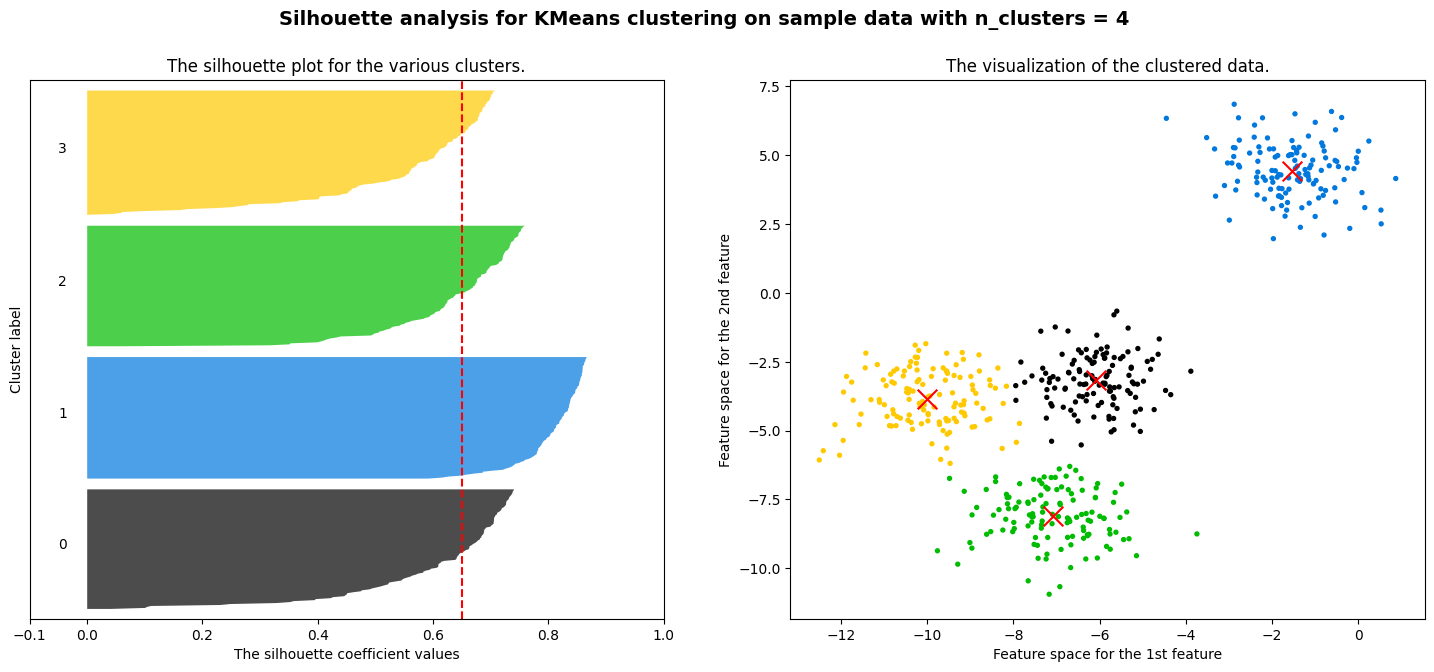

In [58]:
# 创建一个画布，画布上共有一行两列两个图
fig, (ax1, ax2) = plt.subplots(1, 2)

# 画布尺寸
fig.set_size_inches(18, 7)
# 第一个图是我们的轮廓系数图像，是由各个簇的轮廓系数组成的横向条形图
# 横向条形图的横坐标是我们的轮廓系数取值，纵坐标是我们的每个样本，因为轮廓系数是对于每一个样本进行计算的
# 首先我们来设定横坐标
# 轮廓系数的取直范围在[-1,1]之间，但我们至少是希望轮廓系数要大于0的
# 太长的横坐标不利于我们的可视化，所以只设定X轴的取值在[-0.1,1]之间
ax1.set_xlim([-0.1, 1])
# 接下来设定纵坐标，通常来说，纵坐标是从0开始的，最大值取到X.shape[0]的取值
# 但我们希望，每个簇能够排在一起，不同的簇之间能够有一定的空隙
# 以便我们看到不同的条形图聚合成的块，理解他是对应了哪一个簇
# 因此我们在设定纵坐标的取值范围的时候，在X.shape[0]上，加上一个距离(n_clusters + 1) * 10,留作间隔用
ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

# 开始建模，调用聚类好的标签
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
cluster_labels = clusterer.labels_
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# 调用轮廓系数分数，注意，silhouette_score生成的是所有样本点的轮廓系数均值
# 两个需要输入的参数是，特征矩阵X和聚类完毕后的标签
silhouette_avg = silhouette_score(X, cluster_labels)
# 用print来报一下结果，现在的簇数量下，整体的轮廓系数究竟有多少
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)
# 调用silhouette_samples,返回每个样本点的轮廓系数，这就是我们的横坐标
sample_silhouette_values = silhouette_samples(X, cluster_labels)
# 设定y轴上的初始取值
y_lower = 10

# 接下来，对每一个簇进行循环
for i in range(n_clusters):
    # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓系数，并对他进行排序
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    # 注意，.sort()这个命令会直接改掉原数据的顺序
    ith_cluster_silhouette_values.sort()

    # 查看这一个簇中究竟有多少个样本
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    # 这一个簇在y轴上的取值，应该是由初始值(y_lower)开始，到初始值+加上这个簇中的样本数量结束(y_upper)
    y_upper = y_lower + size_cluster_i

    # colormap库中的，使用小数来调用颜色的函数
    # 在nipy_spectral([输入任意小数来代表一个颜色])
    # 在这里我们希望每个簇的颜色是不同的，我们需要的颜色种类刚好是循环的个数的种类
    # 在这里，只要能够确保，每次循环生成的小数是不同的，可以使用任意方式来获取小数
    # 在这里，我是用i的浮点数除以n_clusters,在不同的i下，自然生成不同的小数
    # 以确保所有的簇会有不同的颜色
    color = cm.nipy_spectral(float(i) / n_clusters)

    # 开始填充子图1中的内容
    # fill_bewteen是让一个范围内的柱状图都统一颜色的函数
    # fill_bewteenx的范围是在纵坐标上
    # fill_bewteeny的范围实在横坐标上
    # fill_bewteenx的参数应该输入(纵坐标的下限，纵坐标的上限，x轴上的取值，柱状图的颜色)
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                      , ith_cluster_silhouette_values
                      , facecolor=color
                      , alpha=0.7
                      )

    # 为每个簇的轮廓系数写上簇的编号，并且让簇的编号显示坐标轴上每个条形图的中间位置
    # text的参数为(要显示编号的位置的横坐标，要显示编号的位置的纵坐标，要显示的编号内容)
    ax1.text(-0.05
             , y_lower + 0.5 * size_cluster_i
             , str(i))

    # 为下一个簇计算新的y轴上的初始值，是每一次迭代之后，y的上线再加上10
    # 以此来保证，不同的簇的图像之间显示有空隙
    y_lower = y_upper + 10

# 给图1加上标题，横坐标轴，纵坐标轴的标签
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# 把整个数据集上的轮廓系数的均值以虚线的形式嵌入我们的图中
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# 让y轴不显示任何刻度
ax1.set_yticks([])

# 让X轴上的刻度显示为我们规定的列表
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 开始对第二个图进行处理，首先获取颜色，由于这里没有循环，因此我们需要一次性生成多个小数来获取多个颜色
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1]
            , marker='o'
            , s=8
            , c=colors
            )
centers = clusterer.cluster_centers_

# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
            c="red", alpha=1, s=200)
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


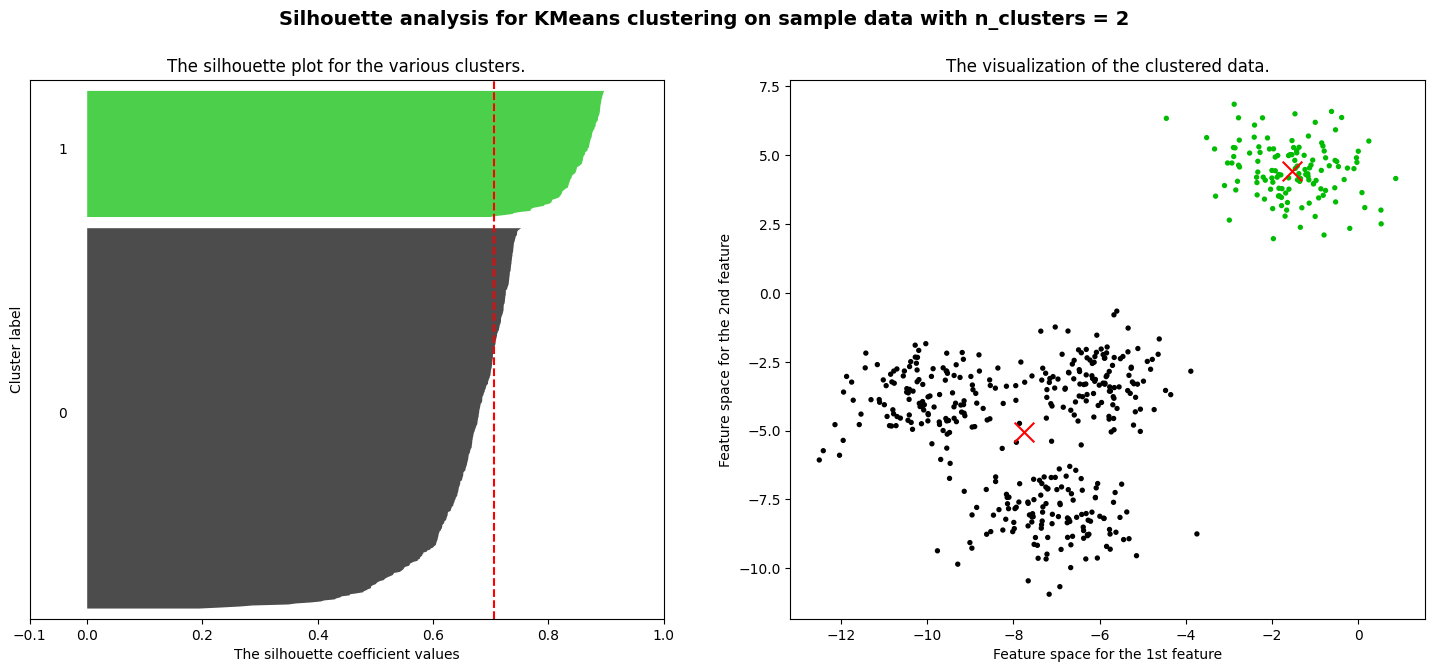

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


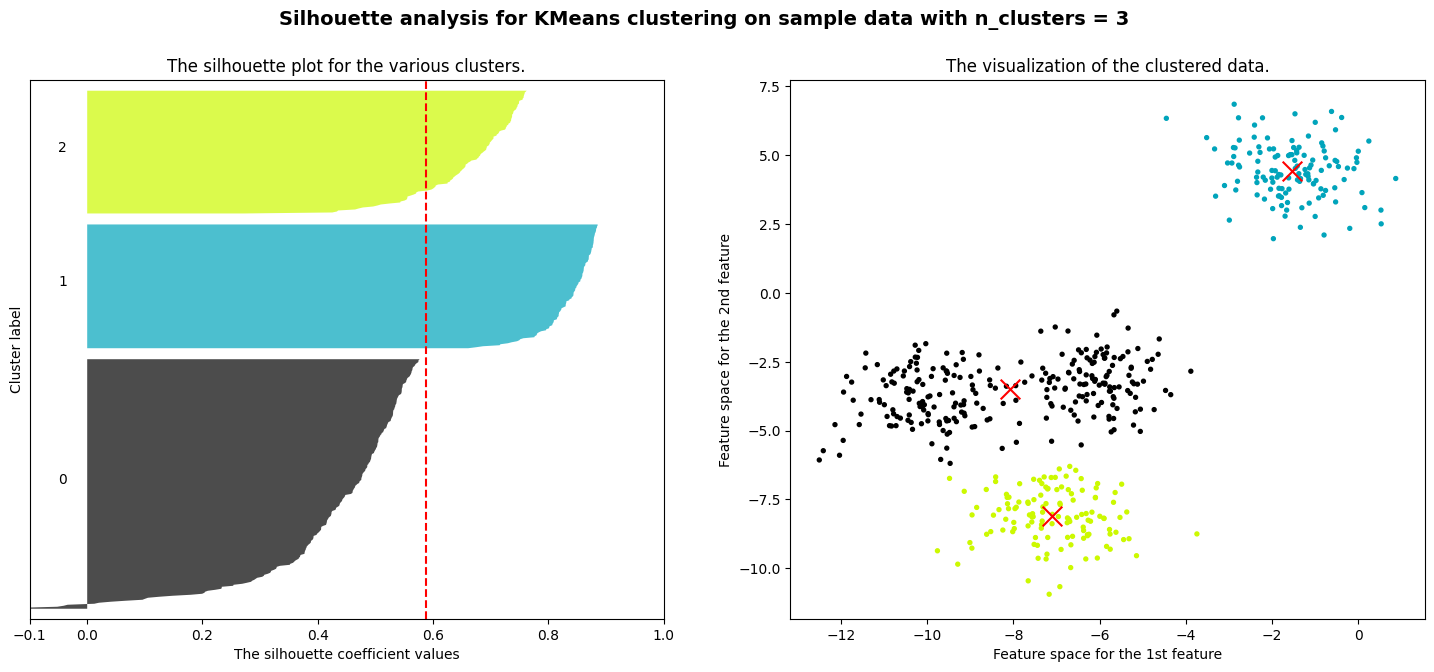

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


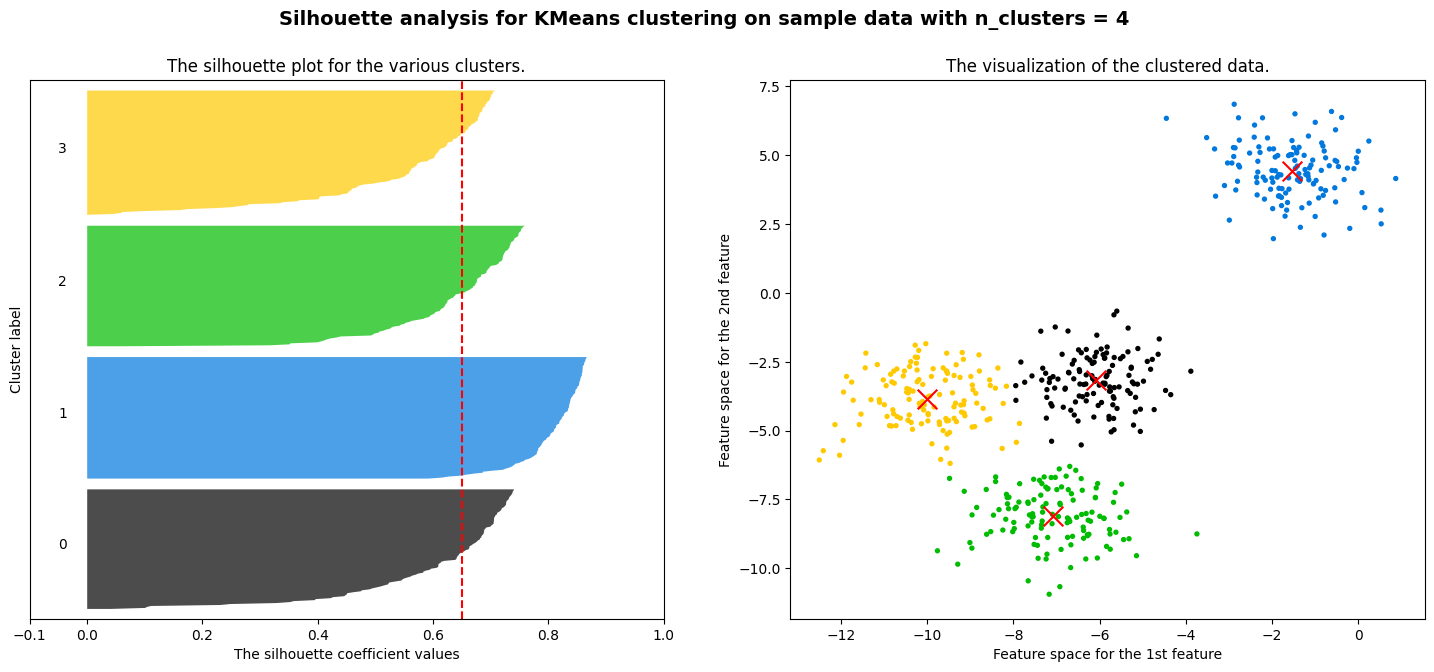

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.56376469026194


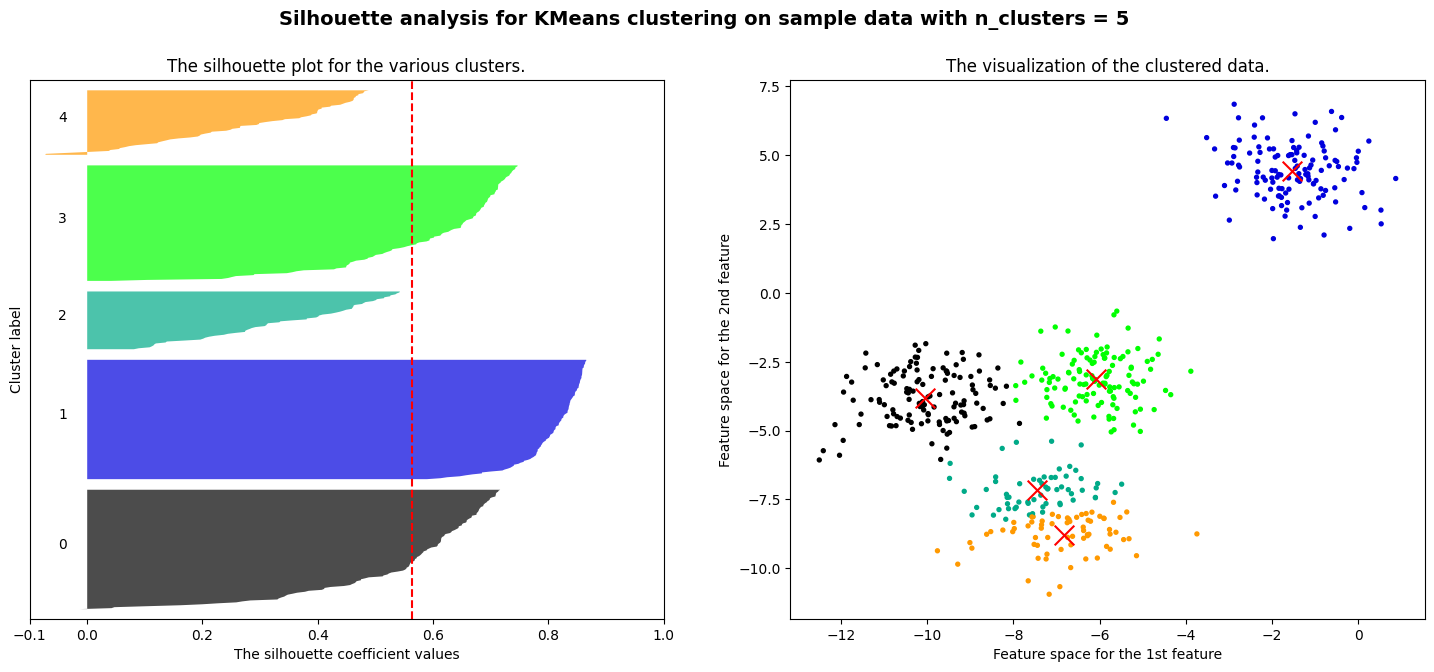

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


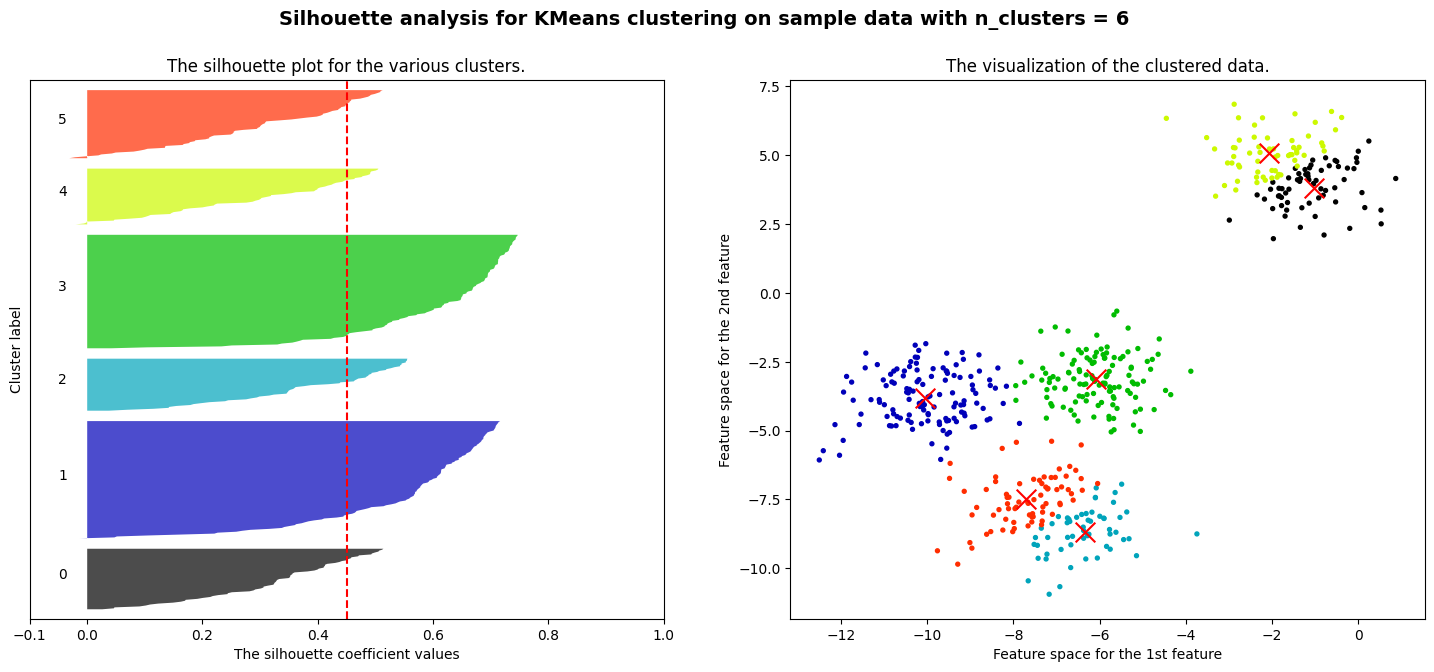

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


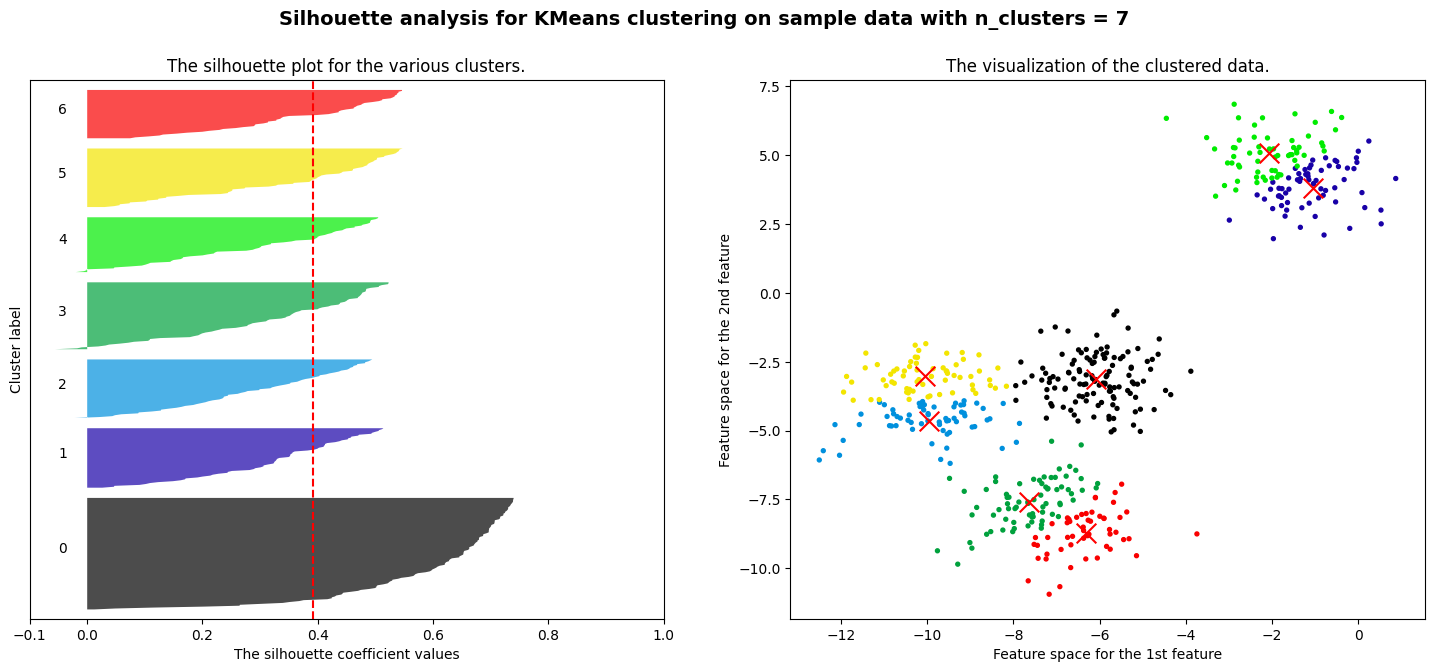

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2, 3, 4, 5, 6, 7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          , ith_cluster_silhouette_values
                          , facecolor=color
                          , alpha=0.7
                          )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
                , marker='o'
                , s=8
                , c=colors
                )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()